In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [8]:
n_neighbors = 15

In [4]:
df = pd.read_csv('https://dl.dropboxusercontent.com/u/75194/stats/data/01_heights_weights_genders.csv')

In [9]:
df.sample()

,Gender,Height,Weight
7907,Female,63.864835,158.94006


In [11]:
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [12]:
df.sample(5)

,Gender,Height,Weight
4847,1,67.683219,192.150042
1274,1,69.227081,185.916021
1056,1,71.910226,198.078825
7486,0,66.981731,158.847956
1956,1,69.342366,197.217940


In [30]:
features=df.columns[1:]
target=df.columns[0]
target

'Gender'

In [24]:
h = .02 

In [25]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


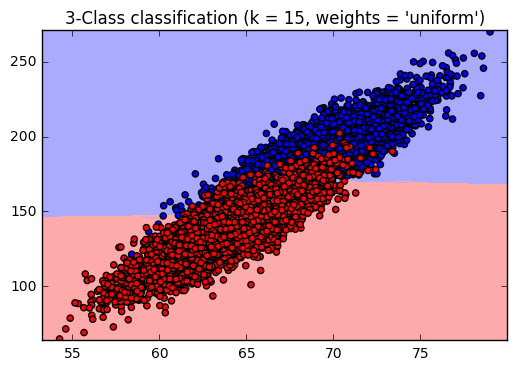

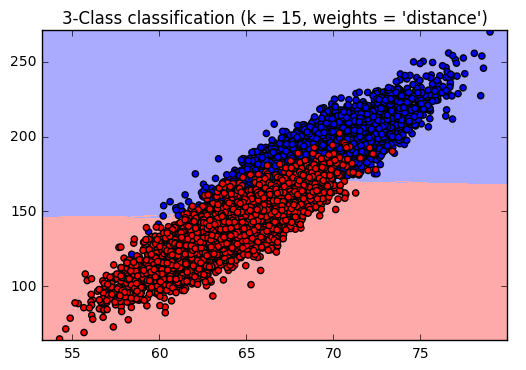

In [ ]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = df[features[0]].min() - 1, df[features[0]].max() + 1
    y_min, y_max = df[features[1]].min() - 1, df[features[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(df[features[0]], df[features[1]], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()